<h1 style="color: #5e9ca0; text-align: center;">Química Analítica</h1>
<h2 style="color: #2e6c80; text-align: center;">Curvas de titulação de Ácido Fraco e Base Forte</h2></br>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.10f}'.format

# mostrando todas as colunas do dataframe
pd.set_option('display.max_columns', None)
# mostrando todas as linhas do dataframe
pd.set_option('display.max_rows', None)



In [23]:
#
# Dados iniciais
#
c_base = 0.1000 # concentração da base (NaOH)
c_acido = 0.1000 # concentração do ácidos
v_acido = 0.05 # volume do ácido
v_base_adicionada = 0.00 # controla a qtde de base adicionada

In [24]:
#
# Dataframe com lista de acidos fracos
#
acidos_fracos = {"Acidos" : 
                 ["H3PO43", "HNO2", "HF", "CH3COOH", "H2CO3", "H2S"],
                "Ka" : [7.6*10**-3,
                        4.3*1**-4,
                        3.5*10**-4,
                        1.75*10**-5,
                        4.3*10**-7,
                        1.3*10**-7                        
                       ]}
df_acidos_fracos = pd.DataFrame(acidos_fracos)

In [25]:
df = df_acidos_fracos.loc[(df_acidos_fracos["Acidos"] == "CH3COOH")]
df

,Acidos,Ka
3,CH3COOH,0.0000175000


<h2 style="color: #2e6c80; text-align: center;">Gerando Dados</h2></br>

In [49]:
# df = df_acidos_fracos.loc[(df_acidos_fracos["Acidos"] == "CH3COOH") | (df_acidos_fracos["Acidos"] == "H3PO43")]

resultados = []
for index, row in df_acidos_fracos.iterrows():
    acido = row['Acidos']
    ka = row['Ka']
    pH = 0
    concentracao_H30 = 0
    for volume_da_base_ad in np.arange(0, 120.1, 0.5):
        # volume em litros
        volume = volume_da_base_ad / 1000
        if volume_da_base_ad == 0:
            # No ponto inicial (sem adição de NaOH)
            concentracao_H3O = np.sqrt(ka * c_acido)
            pH = -np.log10(concentracao_H3O)
            
            # adicionando resultado
            resultados.append([acido, np.around(pH, 3), volume])
        else:
            if volume_da_base_ad < 50:
                # formação de uma solução tampão
                concentracao_sal = (c_base * volume) / (v_acido + volume)
                concentracao_acido = ((c_acido * v_acido) - (c_base * volume)) / (v_acido + volume)
                log_sal_acido = np.log10(concentracao_sal / concentracao_acido)
                pka = -np.log10(ka)
                pH = pka + log_sal_acido

                # adicionando resultado
                resultados.append([acido, np.around(pH, 3), volume])
            else:
                if volume_da_base_ad == 50:
                    # Estamos no ponto de equivalência (PE)
                    # o pH é determinado pela hidrólise do sal formado
                    concentracao_sal = (c_base * volume) / (v_acido + volume)
                    kb =  (1.00 * 10**-14) / (ka)
                    concentracao_OH = np.sqrt(kb * concentracao_sal)
                    pOH = -np.log10(concentracao_OH)
                    pH = 14 - pOH

                    # adicionando resultado
                    resultados.append([acido, np.around(pH, 3), volume])
                else:
                    # Excesso de NaOH (inibe a hidrólise do sal)
                    concentracao_OH = ( (c_base * volume) - (c_acido * v_acido) ) / (v_acido + volume)
                    pOH = -np.log10(concentracao_OH)
                    pH = 14 - pOH

                    # adicionando resultado
                    resultados.append([acido, np.around(pH, 3), volume])    

In [50]:
# Dataframe de resultados
df_resultados = pd.DataFrame(resultados, columns=["Acido", "pH", "Volume"])
df_resultados.loc[(df_resultados["Acido"] == "HNO2")]

,Acido,pH,Volume
241,HNO2,0.1830000000,0.0000000000
242,HNO2,-2.6290000000,0.0005000000
243,HNO2,-2.3240000000,0.0010000000
244,HNO2,-2.1430000000,0.0015000000
245,HNO2,-2.0140000000,0.0020000000
246,HNO2,-1.9120000000,0.0025000000
247,HNO2,-1.8280000000,0.0030000000
248,HNO2,-1.7570000000,0.0035000000
249,HNO2,-1.6940000000,0.0040000000
250,HNO2,-1.6380000000,0.0045000000


<h1>Gráficos</h1>

<h2>Todos os ácidos</h2>

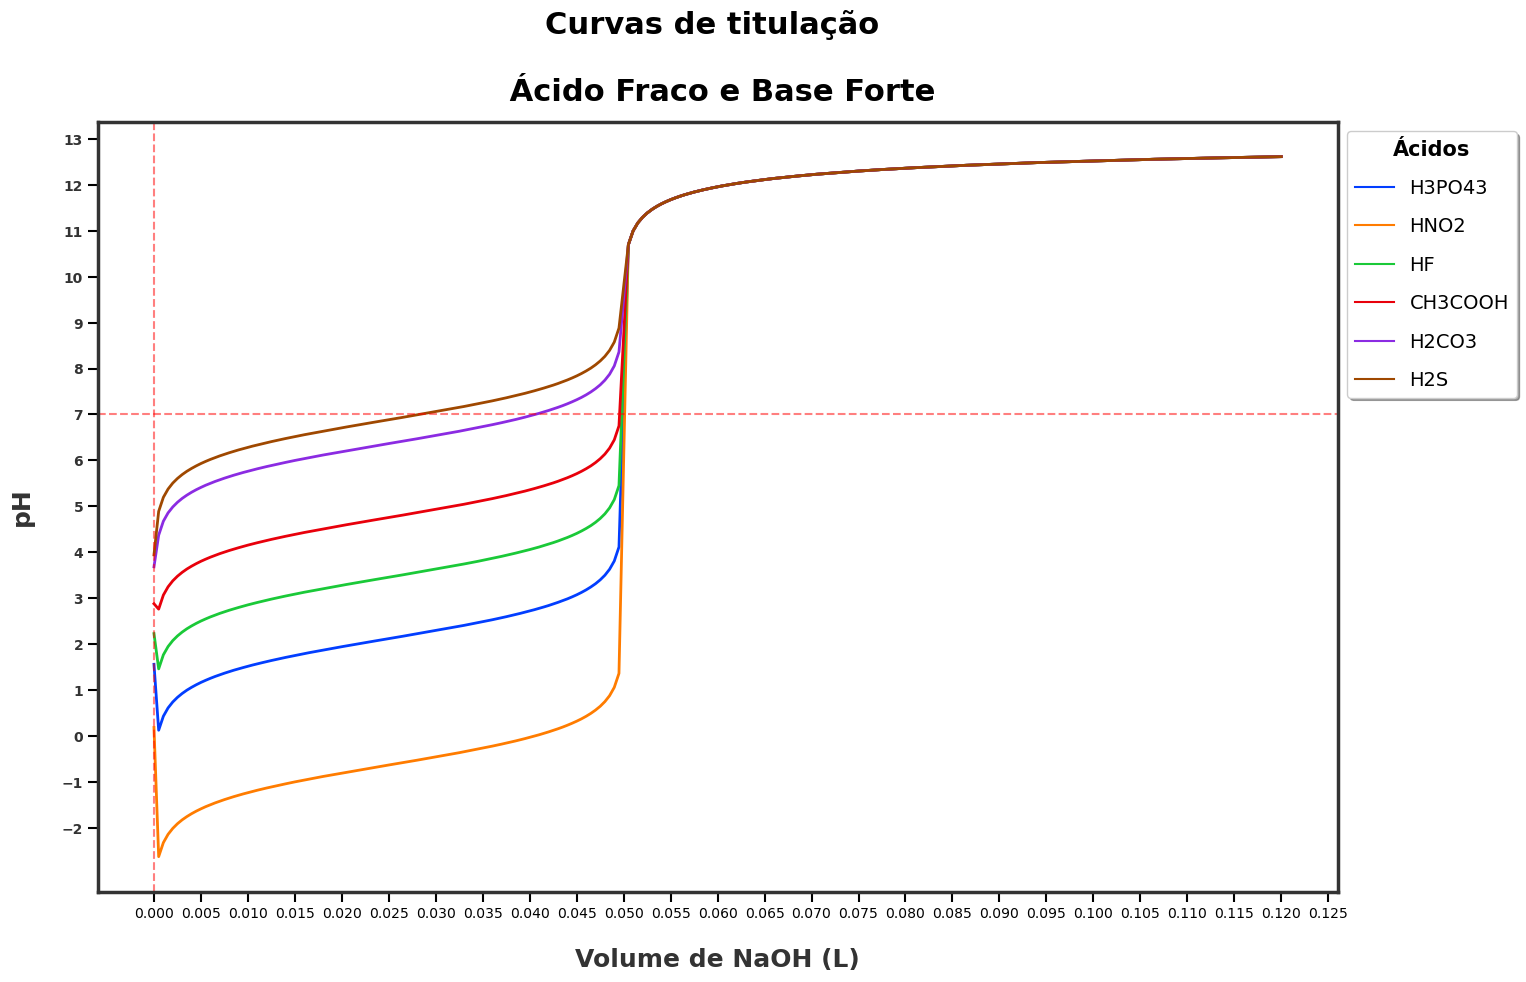

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

#for index, row in df_acidos_fracos.iterrows():
#    df_dados = df_resultados.loc[(df_resultados["Acido"] == row["Acidos"])]
#    sns.lineplot(data = df_dados, x = "Volume", y = "pH", hue="Acido", palette="deep")

df_dados = df_resultados.loc[(df_resultados["Acido"] == "H3PO43") | 
                             (df_resultados["Acido"] == "HNO2") | 
                             (df_resultados["Acido"] == "HF") |
                             (df_resultados["Acido"] == "CH3COOH") |
                             (df_resultados["Acido"] == "H2CO3") | (df_resultados["Acido"] == "H2S") ]
sns.lineplot(data = df_dados, 
             x = "Volume",
             y = "pH",
             hue="Acido", 
             palette="bright",
             linewidth = 2, markevery=[0.01])

# Spines -> as linhas dos eixos
for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')

# Ticks
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_ticks(np.arange(0, 0.13, 0.005))

ax.yaxis.set_ticks_position('left')
ax.yaxis.set_ticks(np.arange(-2, 14, 1))

# Configurando ticks para os valores
# Tick -> linha nos pontos dos eixos
ax.tick_params(which = 'major',
               length = 7,
               grid_alpha = 0.5,
               width = 1.5)

# definição geral dos ticks do eixo y
plt.yticks(size = 10, weight = 'bold', color = '0.2')

ax.set_ylabel('pH', 
             fontsize = 18, weight = 'bold', 
             color = '0.2', labelpad = 20)
ax.set_xlabel('Volume de NaOH (L)', 
              fontsize = 18, weight = 'bold', 
              color = '0.2', labelpad = 20)

# Título do gráfico
ax.set_title("Curvas de titulação \n \n Ácido Fraco e Base Forte", 
             fontweight = 'bold', 
             fontsize = 22, 
             pad = 15)

sns.move_legend(ax, "upper left", 
                bbox_to_anchor=(1, 1),
                fancybox = True,
                shadow = True,
                fontsize = 14,
                title = "Ácidos",
                title_fontsize = 15,
                title_fontweight = 'bold',
                labelspacing = 1)

plt.axvline(0, color='r', ls="--", alpha=0.5)
plt.axhline(7, color='r', ls="--", alpha=0.5)

# Salvando gráfico
plt.savefig('curvas_de_titulacao_ac_fraco_e_base_forte.png', bbox_inches = 'tight', dpi =250, facecolor = ax.get_facecolor())

# Exibindo o gráfico
plt.show()

<h2>Ácido acético</h2>

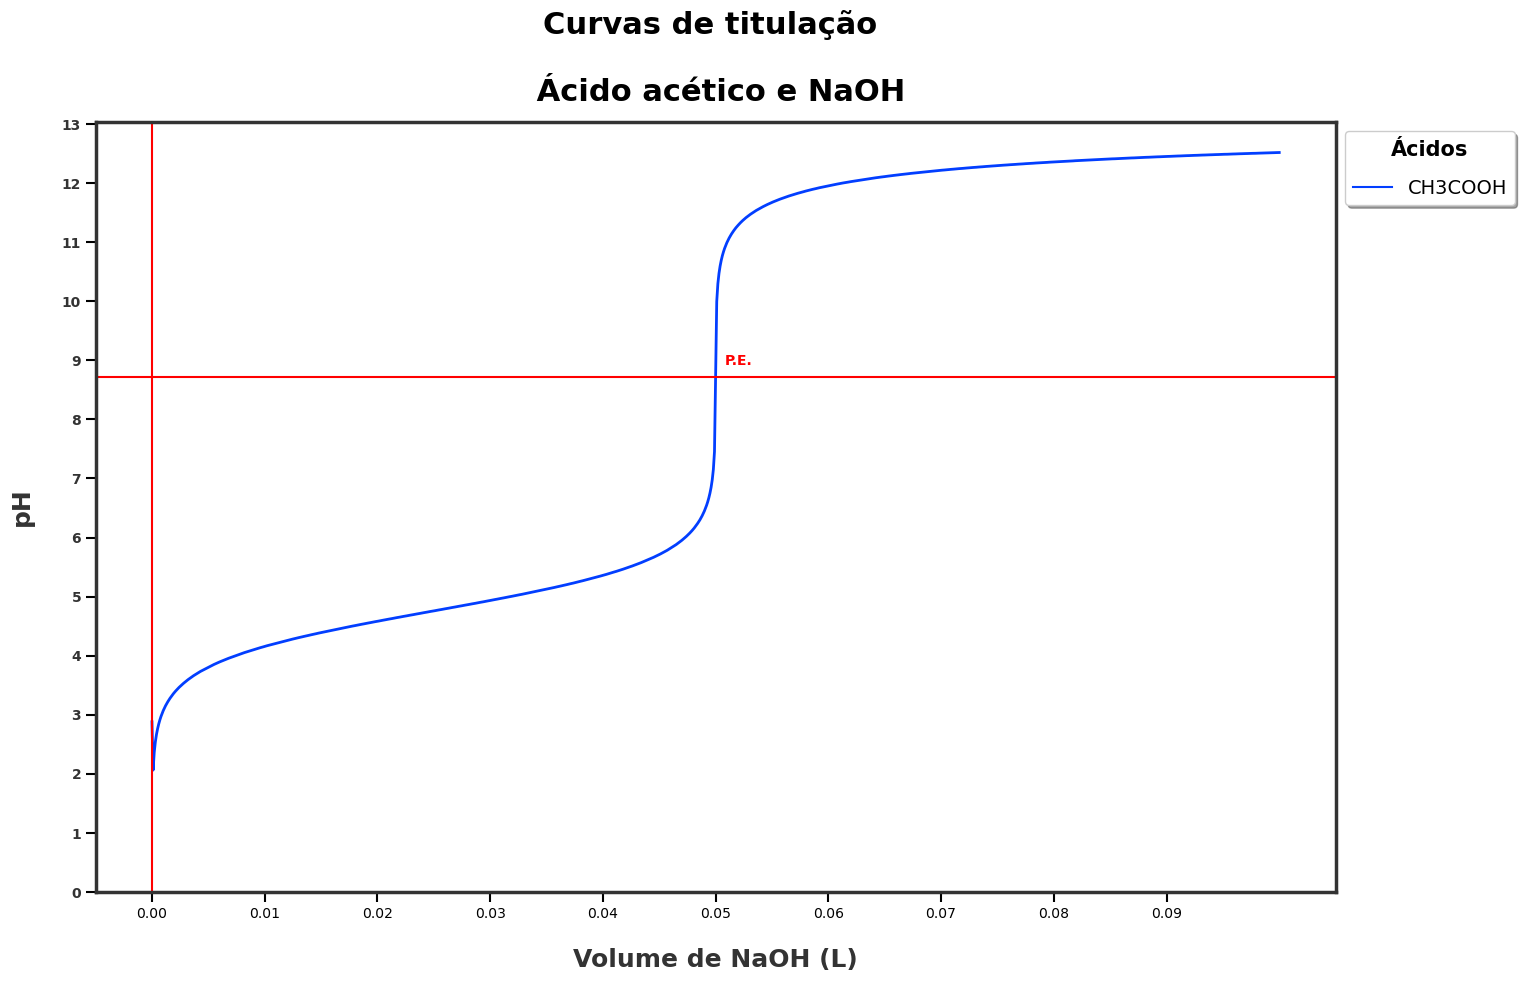

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

df_dados = df_resultados.loc[(df_resultados["Acido"] == "CH3COOH")]
sns.lineplot(data = df_dados, 
             x = "Volume",
             y = "pH",
             hue="Acido", 
             palette="bright",
             linewidth = 2)

# Spines -> as linhas dos eixos
for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')

# Ticks
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_ticks(np.arange(0, 0.10, 0.01))

ax.yaxis.set_ticks_position('left')
ax.yaxis.set_ticks(np.arange(0, 14, 1))

# Configurando ticks para os valores
# Tick -> linha nos pontos dos eixos
ax.tick_params(which = 'major',
               length = 7,
               grid_alpha = 0.5,
               width = 1.5)

# definição geral dos ticks do eixo y
plt.yticks(size = 10, weight = 'bold', color = '0.2')

ax.set_ylabel('pH', 
             fontsize = 18, weight = 'bold', 
             color = '0.2', labelpad = 20)
ax.set_xlabel('Volume de NaOH (L)', 
              fontsize = 18, weight = 'bold', 
              color = '0.2', labelpad = 20)

# Título do gráfico
ax.set_title("Curvas de titulação \n \n Ácido acético e NaOH", 
             fontweight = 'bold', 
             fontsize = 22, 
             pad = 15)

sns.move_legend(ax, "upper left", 
                bbox_to_anchor=(1, 1),
                fancybox = True,
                shadow = True,
                fontsize = 14,
                title = "Ácidos",
                title_fontsize = 15,
                title_fontweight = 'bold',
                labelspacing = 1)

plt.axvline(0, color='r')
plt.axhline(8.728, color='r')

y = 0.05
texto = "P.E."
ax.text(0.052, 9.0, texto, color='red', horizontalalignment='center', verticalalignment='center', fontweight='bold')


# Salvando gráfico
plt.savefig('curvas_de_titulacao_ac_acetico.png', bbox_inches = 'tight', dpi =250, facecolor = ax.get_facecolor())

# Exibindo o gráfico
plt.show()